# Assignment 1: Comparison of Multivariate Linear Regression Models

### CS 4501 Machine Learning - Department of Computer Science - University of Virginia
*In this assignment, you will get to pick your favorite data set on Kaggle (https://kaggle.com) and implement some learning models in the context of a **regression** problem.  For references, you may refer to [my slides](https://docs.google.com/presentation/d/10D1he89peAWaFgjtZlHpUzvOOAie_vIFT95htKCKgc0/edit#slide=id.p) or Chapter 4 of the textbook if you need additional sample codes to help with your assignment. To get started, you will need to determine which dataset to download and copy it into the directory where you wish to run your implementation (ie. same folder as this file).* 

*For deliverables, you must write code in Python and submit **this** Jupyter Notebook file (.ipynb) to earn a total of 100 pts. You will gain points depending on how you perform in the following sections.*


***
## 1. BIG PICTURE (5 pts)
Write a paragraph explaining the context of the problem in which you are trying to investigate. In the same paragraph, explain why you pick your dataset. Then, you MUST include the URL to the dataset to help the TA to download it (we will assume that the data file is put into the same folder as the Jupyter Notebook file). Then, you can write some code to load the CSV file and take a quick look at the dataset, and output the following:

 * How big is your dataset? (in terms of MB)
 * How many entries does it have?
 * How many features does it have?
 * What are some basic statistics you can learn right away about this dataset?

In [143]:
# Import some common packages
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from numpy.random import randn

# to make this notebook's output stable across runs
np.random.seed(42)

# Your code goes here for this section, make sure you also include the output to answer the above questions.
datasetURL = "https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009"; # required url to download for CSV file. The TA will need to download the file and run your program.
data = pd.read_csv("winequality-red.csv")
print(data)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
5               7.4             0.660         0.00             1.8      0.075   
6               7.9             0.600         0.06             1.6      0.069   
7               7.3             0.650         0.00             1.2      0.065   
8               7.8             0.580         0.02             2.0      0.073   
9               7.5             0.500         0.36             6.1      0.071   
10              6.7             0.580         0.08             1.8      0.097   
11              7.5         

In [144]:
# Taking an Initial Look at Data

print(data.shape)
print(data.columns)
print(data.memory_usage(index=True, deep=True).sum())

(1599, 12)
Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')
153584


Based on the code above we can see that the data set has 1599 observations of 12 features and the dataset takes up 152584 bytes of memory(.15 MB). The code below shows a general description of the data.

In [145]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


---
## 2. DATA DISCOVERY, CLEANING, AND SCALING (10 pts)

**Data Discover:** Plot out all correlations among the features. You may notice some features are more correlated with your predicted value than other. This information will help you confirm that weights of your regression model later on.

**Data Cleaning:** If your dataset has some missing values, make sure you are able to fill those values with the Imputer class. If your dataset has categorical features, make sure you conver those features into numerical using OneHotEncoder class. 

**Feature Scaling** More importantly, your task is to write some codes to normalize the value of each features as follow:

* Subtract the mean value of each feature from the dataset
* Scale (divide) the feature values by their respective standard deviation

Implementation Note: You will do this for all features and your code should work with datasets of all sizes (any number of features/ examples). After learning the parameters from the model, you must first normalize the new $x$ value using the mean and standard deviation that you have previously computed from the training set.

In [146]:
# You might want to use the following package
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix # optional
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Your code goes here for this section.
print(data[data.isnull().any(axis=1)])
#this line prints out the features that have null attributes. Since the output is null we know that all features have a value.
corr_matrix = data.corr()
print(corr_matrix)


Empty DataFrame
Columns: [fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, alcohol, quality]
Index: []
                      fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.256131     0.671703   
volatile acidity          -0.256131          1.000000    -0.552496   
citric acid                0.671703         -0.552496     1.000000   
residual sugar             0.114777          0.001918     0.143577   
chlorides                  0.093705          0.061298     0.203823   
free sulfur dioxide       -0.153794         -0.010504    -0.060978   
total sulfur dioxide      -0.113181          0.076470     0.035533   
density                    0.668047          0.022026     0.364947   
pH                        -0.682978          0.234937    -0.541904   
sulphates                  0.183006         -0.260987     0.312770   
alcohol                   -0.061668 

[[<matplotlib.axes._subplots.AxesSubplot object at 0x138e885f8>


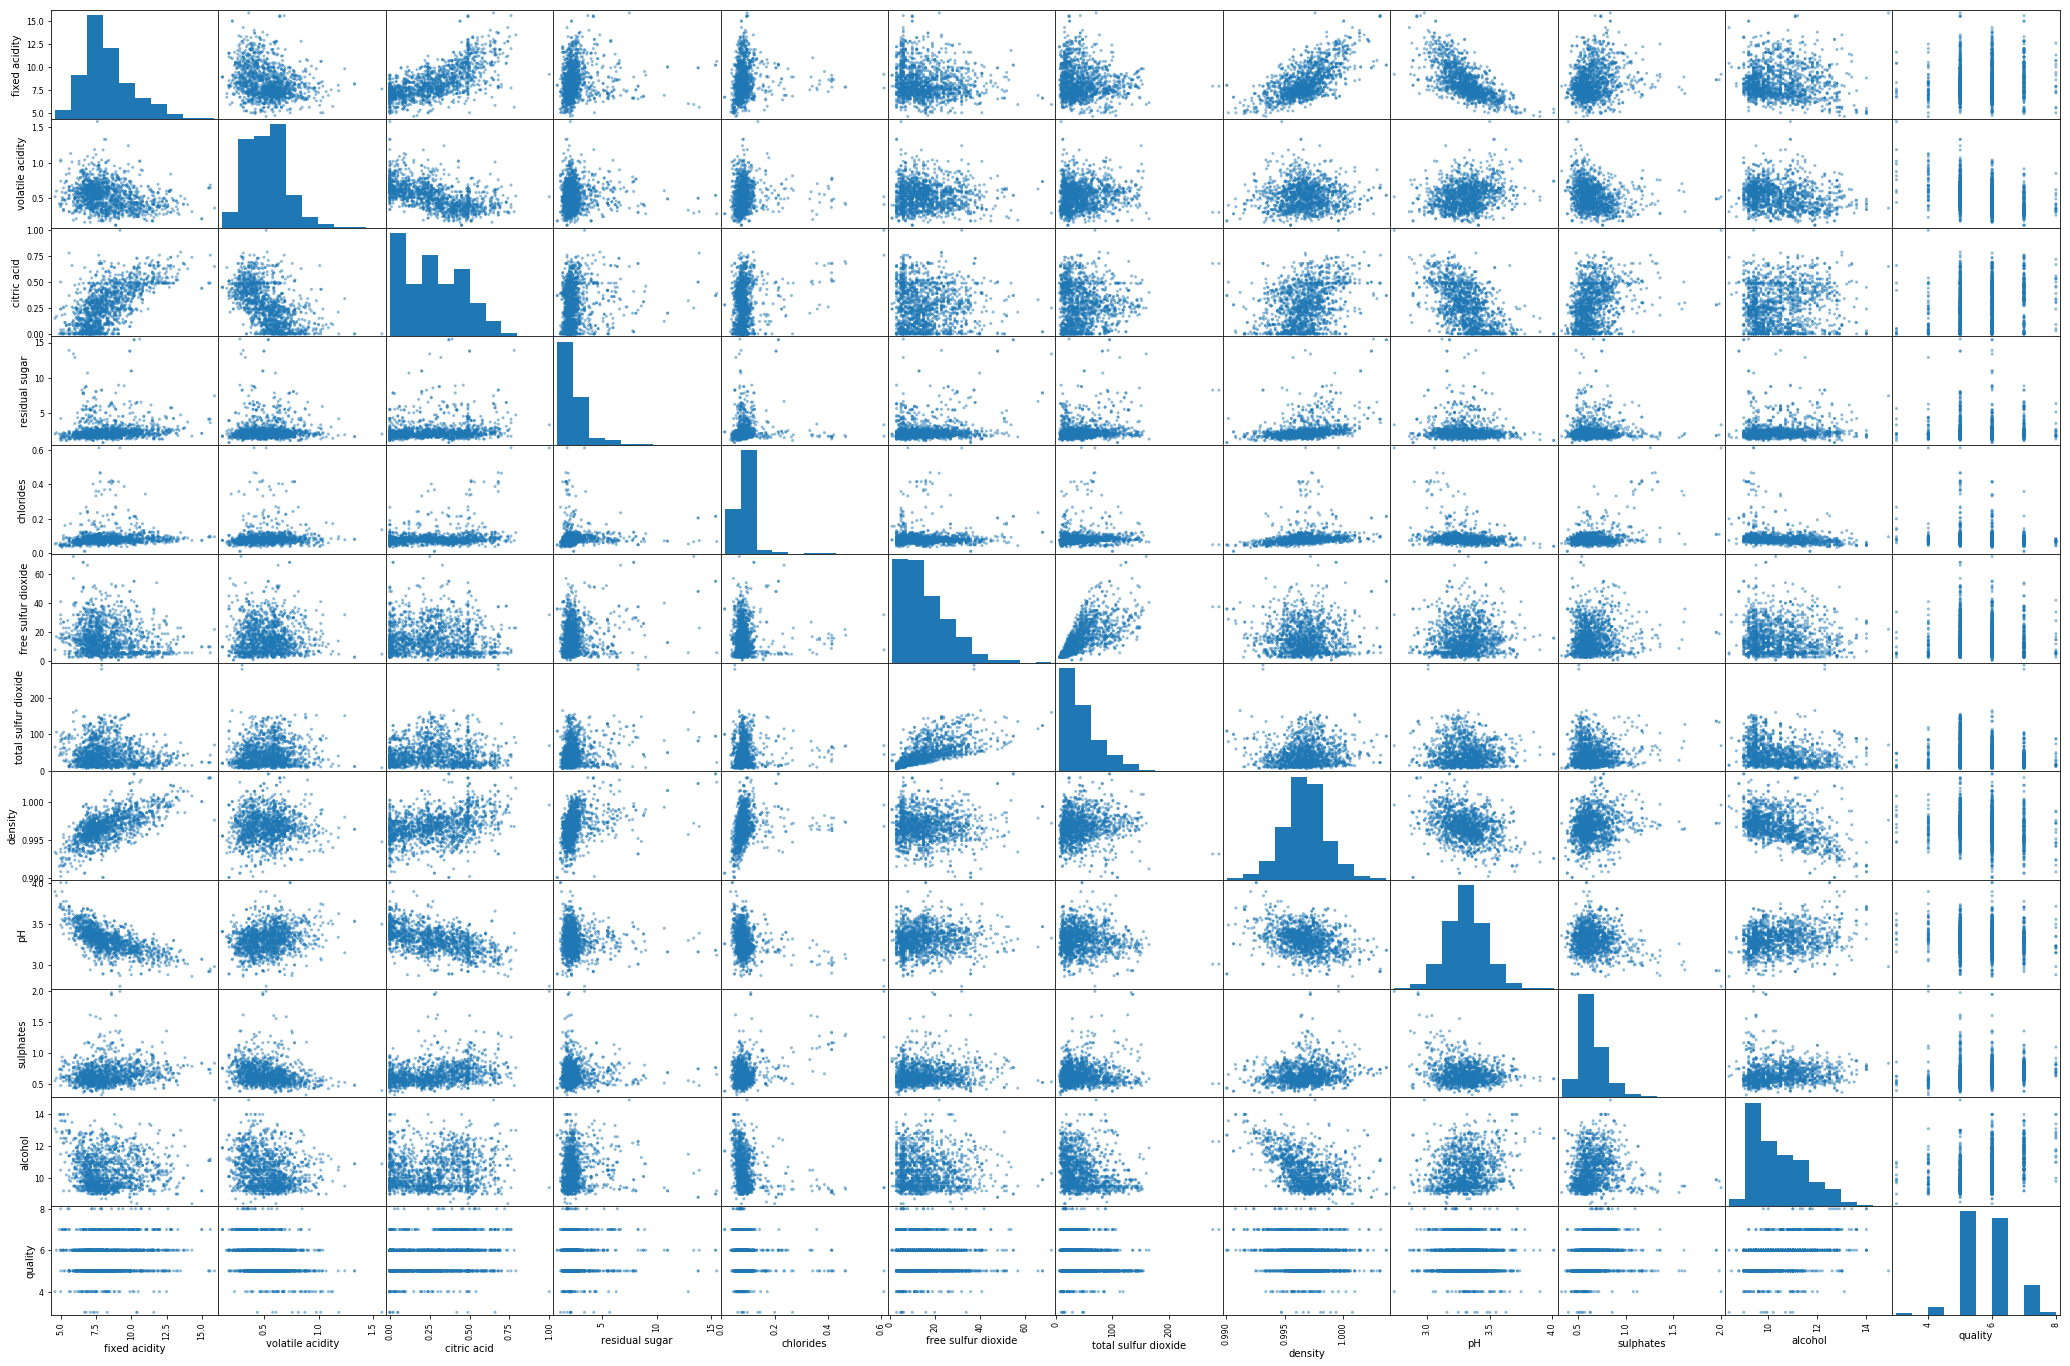

In [147]:

attributes = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality']
print(scatter_matrix(data[attributes], figsize=(36, 24)))
plt.savefig("scatter_matrix_plot")

The matrix above shows the correlation between different variables in the data. We can see that there are many variables with high correlation. Since we are looking at predicting the quality those correlations are very important and the highest correlations so far and alcohol and volatile acidity. 


In [148]:
#Scaling Features
for column in data:
    if(column!="quality"):
        #print(data[column].std())
        data[column] -= data[column].mean()
        data[column] /= data[column].std()
        print("Standard Deviation (should be 1): ", (data[column].std()))
        print("Mean (should be 0): ", str(data[column].mean()))
    else:
        print("Does not scale the quality feature")


Standard Deviation (should be 1):  1.0
Mean (should be 0):  3.554935513496436e-16
Standard Deviation (should be 1):  1.0
Mean (should be 0):  1.6885943689108073e-16
Standard Deviation (should be 1):  1.0
Mean (should be 0):  -1.0664806540489309e-16
Standard Deviation (should be 1):  1.0
Mean (should be 0):  -1.1109173479676363e-16
Standard Deviation (should be 1):  1.0
Mean (should be 0):  3.821555677008669e-16
Standard Deviation (should be 1):  1.0
Mean (should be 0):  -6.221137148618763e-17
Standard Deviation (should be 1):  1.0
Mean (should be 0):  2.666201635122327e-17
Standard Deviation (should be 1):  0.9999999999999999
Mean (should be 0):  -3.469617061172522e-14
Standard Deviation (should be 1):  1.0
Mean (should be 0):  2.861723088364631e-15
Standard Deviation (should be 1):  1.0
Mean (should be 0):  6.754377475643229e-16
Standard Deviation (should be 1):  0.9999999999999998
Mean (should be 0):  1.0664806540489309e-16
Does not scale the quality feature


Since all the means are 0 and the standard deviations are 1 we know that the data is now scaled

In [149]:
y = data.quality #set output value equal to y
X_train,X_test,y_train,y_test = train_test_split(data,y, test_size=0.2, random_state=42) #split data based on random value
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(1279, 12) (1279,)
(320, 12) (320,)


- - -
## 3. IMPLEMENTATION OF GRADIENT DESCENT (45 pts)
The gradient descent formulation remain the same as one in the lecture. Keep in mind that you will need to add a column $\textbf{x}_0$ with all 1s as part of the training data. You should write code to implement the **MyLinearRegression** class and its predefined methods. 

* **Gradient Descent:** Notes that you may NOT call the library linear regression which defeats the purpose of this assignment. Make sure your code supports any number of features and is well-vectorized.

In [130]:
theta = np.random.randn(X_train.shape[1]+1,1)
#print(y_train)

X_b = np.c_[np.ones((X_train.shape[0],1)),X_train]

temp = X_b.dot(theta)#-y_train
print(X_b.dot(theta).shape)
print(y_train.shape)

(1279, 1)
(1279,)


In [98]:
# NOTE: You may not use the library Linear Regression, but implement your own!
# REMEMBER to place self.attribute = 0 with value from your implementation

class MyLinearRegression:
    def __init__ (self):
        self.theta = 0; # parameter vector;
        self.alpha = 0.1; # learning rate
        self.cost  = 0; # cost function
  
    def fitUsingGradientDescent(self, X_train, y_train):
        theta = np.random.randn(X_train.shape[1],1)
        self.theta =self.gradientDescent(X_train,y_train,theta,self.alpha,10)
    
    def gradientDescent(self, X_train, y_train, theta, alpha, iters):
        # INPUT:
        # alpha: the learning rate
        # iters: number of iterations
        # 
        # OUTPUT: 
        # theta: updated value for theta
        # cost: value of the cost function
        #
        # implementation code here
        X_b = np.c_[np.ones((X_train.shape[0],1)),X_train]
        m = 100
        for iteration in range(iters):
            gradients = 2/m * X_b.T.dot(X_b.dot(theta)-y_train)
            theta = theta - eta* gradients
        self.theta = theta
        return theta
    
    def predict(self, X_test):
        X_test_b = np.c_[np.ones((X_test.shape[0],1)),X_test]
        y_predict = X_test_b.dot(self.theta)
        return y_predict
    
    
    def fitUsingNormalEquation(self, X_train, y_train):
        X_b = np.c_[np.ones((X_train.shape[0],1)),X_train]
        theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y_train)
        self.theta = theta_best;
    
# Your code goes here to call the instance of class MyLinearRegression
myGradientDescentModel = MyLinearRegression()
myGradientDescentModel.fitUsingGradientDescent(X_train, y_train)    

ValueError: operands could not be broadcast together with shapes (1279,13) (1279,) 

* **Learning Rate:** You will try out different learning rates for the dataset and find a learning rate that converges quickly. If you pick a learning rate, your plot of Cost Function $J(\theta)$ against number of iteration will quickly decay to a small value. This also indicates that your implementation is correct. If your learning rate is too large, the cost function $J(\theta)$ can diverge and blow up. From the below plot, you must be able to report the best learning rate the you found to earn credit for this section.

In [91]:
# Use the following code to plot out your learning rate
# iters and cost must be supplied to plot out the cost function
# You may plot multiple curves corresponding to different learning rates to justify the best one.
#
# plt.set_xlabel('Iterations')  
# plt.set_ylabel('Cost')  
# plt.set_title('Error vs. Training Iterations')  

- - -
## 4. IMPLEMENTATION OF THE NORMAL EQUATION (10 pts)

In my lecture, you learn that the closed form solution of linear regression using the normal equation formulation. Using the formula does not require any feature scaling, and should be straight forward to implement: 

$
    \mathbf{\theta} = ({\mathbf{X}^{T}\mathbf{X}})^{-1}\mathbf{X}^{T}\mathbf{y}.
$

Note that you still need to add a column of 1's to the $\mathbf{
X}$ matrix to have an intercept term.

In [113]:
# Implement the normalEquation method of the MyLinearRegression Class before execute the code below:
myNormalEquationModel = MyLinearRegression()
myNormalEquationModel.fitUsingNormalEquation(X_train, y_train)

- - -
## 5. COMPARISON OF DIFFERENT IMPLEMENTATIONS (20 pts)

You should be able to evaluate and compare your gradient descent as well as normal equation implementation of linear regression. In theory, they should be the same, or at least similar. For good measures, you may also use the built-in library **Scholastic Gradient Descent (SGD)** as a third model for comparison. For each model, you must compute the Root Mean Squared Error (RMSE) as performance measure. The good news is that you can call library functions to compute these as shown below instead of writing your own code:

* Which one yields the best performance measure for your dataset?
* What is your assessment of the error? Good? Okay? Terrible?

In [114]:
from sklearn.metrics import mean_squared_error

# Use the built-in SGD Regressor model
from sklearn.linear_model import SGDRegressor
mySGDModel = SGDRegressor()
mySGDModel.fit(X_train,y_train)
y_predict = mySGDModel.predict(X_test)
mse = mean_squared_error(y_test, y_predict)
mySGDModel_rmse = np.sqrt(mse)
print("SDG RMSE: ", mySGDModel_rmse)

myNormalEquationModel.predict(X_test)
mse = mean_squared_error(y_test, y_predict)
# myGradientDescentModel_rmse  
myNormalEquationModel_rmse = np.sqrt(mse)
print("Normal Equation RMSE: ", myNormalEquationModel_rmse)



SDG RMSE:  0.016931051626244104
Normal Equation RMSE:  0.016931051626244104


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


- - -
## 6. PRESENTATION OF YOUR SOLUTION (10 pts)

Now that you need to write a short memo of one paragraph to be read by a non-technical audience (ie. your manager/boss). Focus on answering the following: 

* How can you pitch your solution to this project? 
* What did you learn so far about the problem?
* Is there any insight moving forward to improve the solution.

In [16]:
# Your paragraph goes here for this section

- - - 
### NEED HELP?

In case you get stuck in any step in the process, you may find some useful information from:

 * Consult my [slides](https://docs.google.com/presentation/d/10D1he89peAWaFgjtZlHpUzvOOAie_vIFT95htKCKgc0/edit?usp=sharing) and/or the textbook
 * Talk to the TA, they are available and there to help you during [office hour](http://bit.ly/cs4501oh)
 * Come talk to me or email me <nn4pj@virginia.edu> with subject starting "CS4501 Assignment 1:...".

Best of luck and have fun!